In [24]:
# import
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [25]:
# create ref to CSV file desired
csv_path = Path("data/OPTED-Dictionary.csv")

# read csv
dict_df = pd.read_csv(csv_path, low_memory = False)

# Print the first five rows of data
dict_df.head()

,Word,Count,POS,Definition
0,A,1,"""""","""The first letter of the English and of many o..."
1,A,1,"""""","""The name of the sixth tone in the model major..."
2,A,1,"""""","""An adjective commonly called the indefinite ..."
3,A,1,"""""","""In each; to or for each; as """"""""twenty leagu..."
4,A,1,"""prep.""","""In; on; at; by."""


In [26]:
# rename cols

dict_df = dict_df.rename(columns={"Count": "No. of Letters", "POS": "Parts of Speech"})

dict_df.head()

,Word,No. of Letters,Parts of Speech,Definition
0,A,1,"""""","""The first letter of the English and of many o..."
1,A,1,"""""","""The name of the sixth tone in the model major..."
2,A,1,"""""","""An adjective commonly called the indefinite ..."
3,A,1,"""""","""In each; to or for each; as """"""""twenty leagu..."
4,A,1,"""prep.""","""In; on; at; by."""


In [27]:
dict_df.count()

Word               176008
No. of Letters     176009
Parts of Speech    176009
Definition         176009
dtype: int64

In [28]:
# which parts of speech has the highest count
pos_counts = dict_df["Parts of Speech"].value_counts()
pos_counts

# seems like nouns are the most common in the english language

"n."                    84932
"a."                    35189
"v. t."                 18216
"v. i."                  7167
"p. pr. & vb. n."        5802
                        ...  
"imp. & p. p.               1
"a. a."                     1
"p. pr. a. & vb. n."        1
"n. a."                     1
"dat. & obj."               1
Name: Parts of Speech, Length: 295, dtype: int64

In [29]:
dict_df["Parts of Speech"].unique()

array(['""', '"prep."', '"n."', '"a."', '"v. t."', '"adv."', '"pl. "',
       '"p. p."', '"imp. & p. p."', '"p. pr. & vb. n."', '"v."',
       '"v. i."', '"n. pl."', '"adv. & a."', '"superl."', '"v. t. & i."',
       '"p. a."', '"p. p. & a."', '"a & n."', '"a. & adv."',
       '"interj. & adv."', '"imp. & p. p. Adored (/"', '"n. & a."',
       '"imp. / p. p."', '"p. pr. / vb. n."', '"p. pr."', '"a. superl."',
       '"adv. & prep."', '"a & p. p."', '"n. & v."', '"interj."',
       '"A prefix."', '"conj."', '"a. & n."', '"v. t. / i."', '"adj."',
       '"n. sing. & pl."', '"prep. & adv."', '"adv. & conj."',
       '"n. fem."', '"ambassade."', '"p. p. & p. a."', '"interj.',
       '"p pr. & vb. n."', '"imp. p. p."', '"pron. & a."', '"a. / n."',
       '"n. pl"', '"a. & pron."', '"pref."', '"imp."', '"p. p. "',
       '"adv. or prep."', '"v. i. & t."', '"sing."', '"n.', '"n.p."',
       '"v./t."', '"pl."', '"p.a."', '"/"', '"n. & v. t."', '"n ."',
       '"p. pr & vb. n."', '"n. sing. & p

In [30]:
# filter nouns only
# notice there are extra quotation marks
nouns_df = dict_df.loc[(dict_df["Parts of Speech"] == '"n."')]
nouns_df.head()

,Word,No. of Letters,Parts of Speech,Definition
11,Aam,3,"""n.""","""A Dutch and German measure of liquids varyin..."
12,Aard-vark,9,"""n.""","""An edentate mammal of the genus Orycteropus ..."
13,Aard-wolf,9,"""n.""","""A carnivorous quadruped (Proteles Lalandii) ..."
19,Ab,2,"""n.""","""The fifth month of the Jewish year according ..."
20,Abaca,5,"""n.""","""The Manila-hemp plant (Musa textilis); also ..."


In [34]:
# what is the most common number of letters in the english dictionary?
common_no_of_letters = dict_df["No. of Letters"].value_counts()
common_no_of_letters.head()

# the most common amount of letters in the english dictionary is 8

8     23821
7     23644
9     22126
6     21576
10    17983
Name: No. of Letters, dtype: int64

In [32]:
# let's see what the words are
eight_letters_df = dict_df.loc[(dict_df["No. of Letters"] == "8"),:]
eight_letters_df.head()

,Word,No. of Letters,Parts of Speech,Definition
30,Abaction,8,"""n.""","""Stealing cattle on a large scale."""
33,Abaculus,8,"""n.""","""A small tile of glass marble or other substa..."
34,Abacuses,8,"""pl. ""","""of Abacus"""
86,Abasedly,8,"""adv.""","""Abjectly; downcastly."""
90,Abashing,8,"""p. pr. & vb. n.""","""of Abash"""


In [60]:
most_num_letters_df = pd.DataFrame({"No. of Letters": common_no_of_letters})
# create new col by using the current index (which is number of letters) into its own col and reset index
most_num_letters_df = most_num_letters_df.reset_index()
most_num_letters_df.head()

,index,No. of Letters
0,8,23821
1,7,23644
2,9,22126
3,6,21576
4,10,17983


In [61]:
#rename index col to letters and count
most_num_letters_df = most_num_letters_df.rename(columns = {"index": "No. of Letters", "No. of Letters": "count"})
most_num_letters_df.head()

,No. of Letters,count
0,8,23821
1,7,23644
2,9,22126
3,6,21576
4,10,17983


In [ ]:
most_num_letters_df = most_num_letters_df.sort_values(by = "No. of Letters", ascending = False).reset_index(drop=True)
most_num_letters_df.head()

,No. of Letters,count
0,9.0,22126
1,83.0,1
2,8.0,23821
3,70.0,1
4,7.0,23644


In [68]:
most_num_letters_df = most_num_letters_df.dropna(subset = ["No. of Letters"])
most_num_letters_df["No. of Letters"] = most_num_letters_df["No. of Letters"].astype(int)
most_num_letters_df.head()


,No. of Letters,count
0,9,22126
1,83,1
2,8,23821
3,70,1
4,7,23644


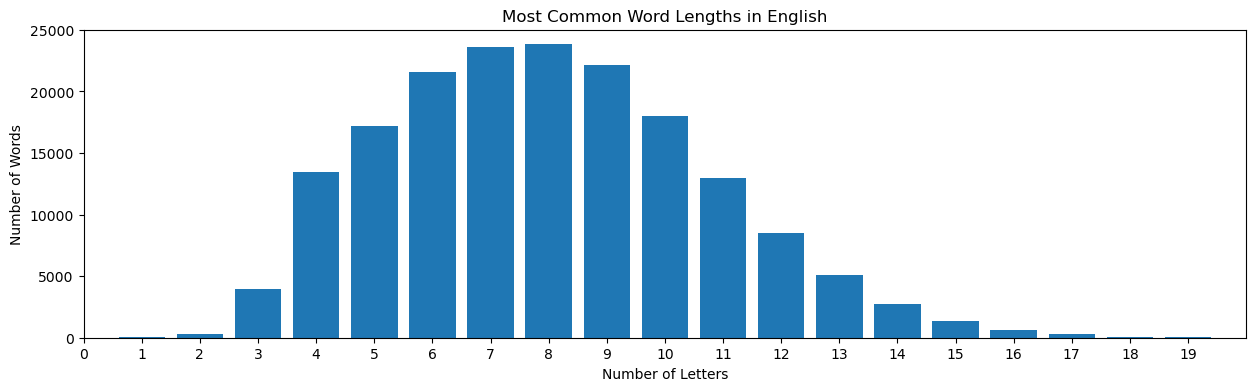

In [81]:
# plot most common amount of letters vs number of words with that common amount of letters
xvals = most_num_letters_df['No. of Letters']
yvals = most_num_letters_df['count']
plt.figure(figsize = (15, 4))
plt.bar(xvals, yvals)
tick_loc = [vals for vals in range(20)]
plt.xticks(tick_loc)
plt.xlabel("Number of Letters")
plt.ylabel("Number of Words")
plt.title("Most Common Word Lengths in English")
plt.xlim(0, 20)
plt.savefig("images/Common_word_length.png")
plt.show()